In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set Seaborn style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
file_path = "construction_data_set.csv.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

In [4]:
d1=df.head(10)
print(d1)

  Project_ID    Location  Start_Date    End_Date  Planned_Cost  Actual_Cost  \
0    PJT1203        Pune  05-10-2024  26-01-2025       3990000   5202700.97   
1    PJT1266      Nagpur  25-07-2022  22-09-2022       4806000   4564769.29   
2    PJT1152      Nagpur  31-12-2023  13-04-2024       2016000   2591039.55   
3    PJT1009      Nashik  01-06-2024  12-07-2024       1365000   1833365.00   
4    PJT1233      Nashik  17-03-2023  06-05-2023       3338000   4306144.01   
5    PJT1226      Nagpur  20-01-2022  14-04-2022       2463000   2121751.01   
6    PJT1196  Aurangabad  25-09-2022  05-01-2023       3585000   3161686.17   
7    PJT1109      Nashik  18-07-2024  04-10-2024       1617000   1779151.90   
8    PJT1005      Nashik  12-08-2022  22-11-2022       1726000   1683037.12   
9    PJT1175      Nagpur  29-08-2023  12-12-2023       3633000   3163314.83   

      Status  Team_Size  Daily_Progress (%) Materials_Issues Weather_Delay  
0  Completed          8                4.10          

In [5]:
# Convert Start_Date and End_Date to datetime format
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format="%d-%m-%Y")
df['End_Date'] = pd.to_datetime(df['End_Date'], format="%d-%m-%Y")

In [6]:
# Calculate duration in days
df['Duration_Days'] = (df['End_Date'] - df['Start_Date']).dt.days


In [7]:
# Calculate Cost Overrun and flag over-budget projects
df['Cost_Overrun'] = df['Actual_Cost'] - df['Planned_Cost']
df['Over_Budget'] = df['Cost_Overrun'] > 0

In [8]:
# --- Basic Analysis ---

# 1. Count of over-budget vs. under-budget projects
overrun_stats = df['Over_Budget'].value_counts()
print("Over-budget count:\n", overrun_stats)

Over-budget count:
 Over_Budget
True     19
False    11
Name: count, dtype: int64


In [9]:
# 2. Average cost overrun (only over-budget projects)
avg_cost_overrun = df[df['Over_Budget']]['Cost_Overrun'].mean()
print("\nAverage cost overrun (₹):", avg_cost_overrun)


Average cost overrun (₹): 560927.92


In [10]:
# 3. Over-budget rate by location
location_overrun = df.groupby('Location')['Over_Budget'].mean().sort_values(ascending=False)
print("\nOver-budget rate by location:\n", location_overrun)


Over-budget rate by location:
 Location
Pune          1.000000
Nashik        0.777778
Mumbai        0.750000
Nagpur        0.545455
Aurangabad    0.250000
Name: Over_Budget, dtype: float64


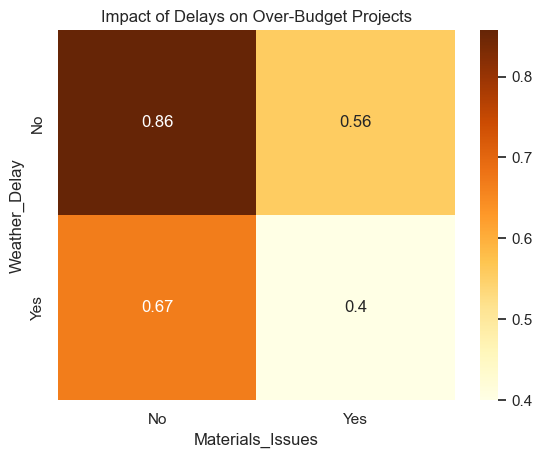

In [11]:
delay_impact = df.groupby(['Weather_Delay', 'Materials_Issues'])['Over_Budget'].mean().unstack()
sns.heatmap(delay_impact, annot=True, cmap="YlOrBr")
plt.title("Impact of Delays on Over-Budget Projects")
plt.show()

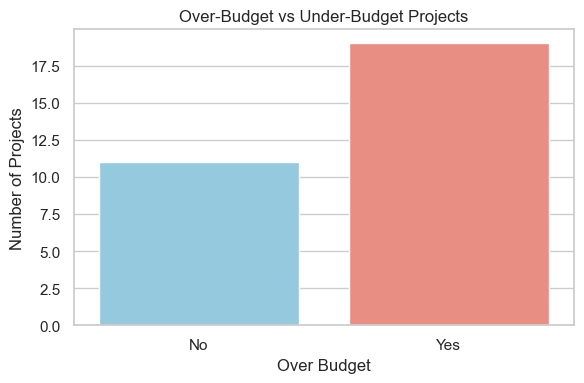

In [20]:
# --- Visualizations ---

# Plot 1: Over-budget vs Under-budget Projects
plt.figure(figsize=(6, 4))
sns.countplot(x='Over_Budget', data=df, palette={True: "salmon", False: "skyblue"})
plt.title("Over-Budget vs Under-Budget Projects")
plt.xlabel("Over Budget")
plt.ylabel("Number of Projects")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()

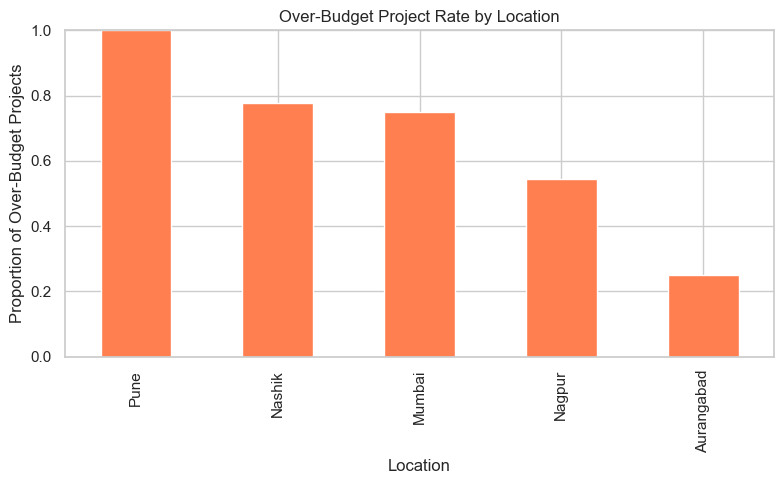

In [13]:
# Plot 2: Average Cost Overrun by Location
plt.figure(figsize=(8, 5))
location_overrun.plot(kind='bar', color='coral')
plt.title("Over-Budget Project Rate by Location")
plt.xlabel("Location")
plt.ylabel("Proportion of Over-Budget Projects")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

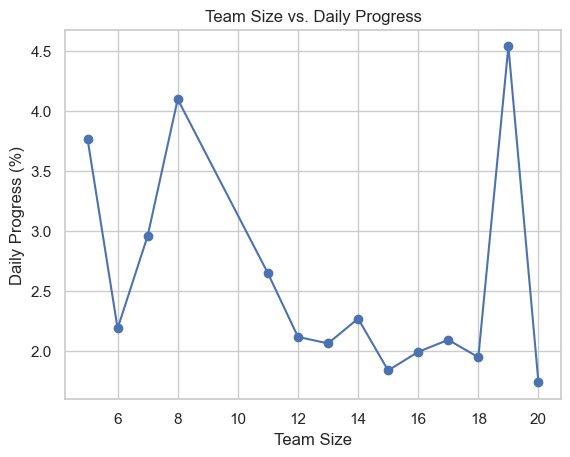

In [14]:
#. Team Size & Performance
team_perf = df.groupby('Team_Size')['Daily_Progress (%)'].mean()
plt.plot(team_perf.index, team_perf.values, marker='o')
plt.title("Team Size vs. Daily Progress")
plt.xlabel("Team Size")
plt.ylabel("Daily Progress (%)")
plt.grid(True)
plt.show()

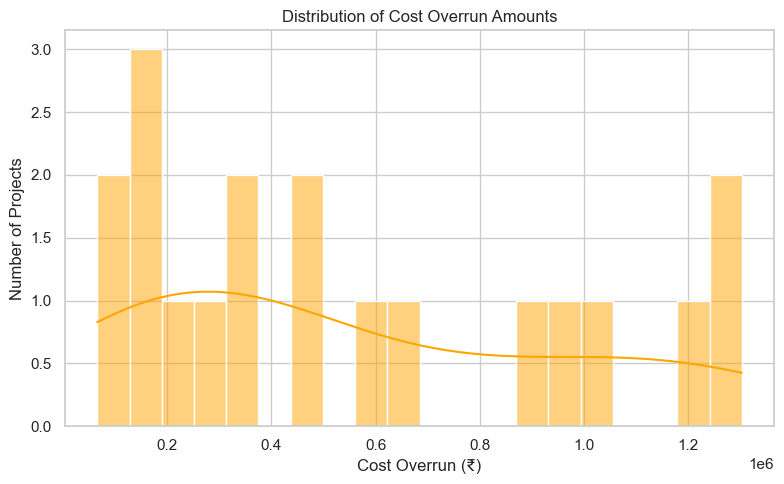

In [15]:
# Plot 3: Distribution of Cost Overruns (only over-budget projects)
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Over_Budget']]['Cost_Overrun'], bins=20, kde=True, color='orange')
plt.title("Distribution of Cost Overrun Amounts")
plt.xlabel("Cost Overrun (₹)")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

In [16]:
print("=== PROJECT KPI SUMMARY ===")
print("Total Projects:", len(df))
print("Over Budget Projects:", df['Over_Budget'].sum())


=== PROJECT KPI SUMMARY ===
Total Projects: 30
Over Budget Projects: 19


In [17]:
# --- Preview cleaned data ---
print("\nSample cleaned data:")
print(df[['Project_ID', 'Location', 'Planned_Cost', 'Actual_Cost', 'Cost_Overrun', 'Over_Budget', 'Duration_Days']].head())



Sample cleaned data:
  Project_ID Location  Planned_Cost  Actual_Cost  Cost_Overrun  Over_Budget  \
0    PJT1203     Pune       3990000   5202700.97    1212700.97         True   
1    PJT1266   Nagpur       4806000   4564769.29    -241230.71        False   
2    PJT1152   Nagpur       2016000   2591039.55     575039.55         True   
3    PJT1009   Nashik       1365000   1833365.00     468365.00         True   
4    PJT1233   Nashik       3338000   4306144.01     968144.01         True   

   Duration_Days  
0            113  
1             59  
2            104  
3             41  
4             50  
